In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '466af531834f464ca74e287d6b40d073',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12492,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.995781e+07,1.995781e+07,False,1.783104e+12,NaN,1,NaN,NaN,None,2025-12-05T19:20:00.000Z,89343.703102,6.356752e+10,-3.9358,-0.175518,-2.119799,-1.842396,-14.354722,-28.832190,-18.919030,1.783104e+12,58.7844,1.876218e+12,None,2025-12-05T19:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:22:33.026734
1,1027,Ethereum,ETH,ethereum,11232,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206954e+08,1.206954e+08,True,3.647571e+11,NaN,2,NaN,NaN,None,2025-12-05T19:20:00.000Z,3022.128543,2.841014e+10,-2.3448,-0.742685,-1.988346,-0.788033,-12.586087,-35.758391,-29.223114,3.647571e+11,12.0251,3.647571e+11,None,2025-12-05T19:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:22:33.026734
2,825,Tether USDt,USDT,tether,160831,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.855162e+11,1.878597e+11,True,1.879162e+11,NaN,3,NaN,NaN,None,2025-12-05T19:19:00.000Z,1.000301,1.003604e+11,-2.2292,0.000450,-0.003907,0.018214,0.052075,-0.002891,0.013309,1.855720e+11,6.1178,1.879162e+11,None,2025-12-05T19:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-05 23:22:33.026734
3,52,XRP,XRP,xrp,1764,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.033164e+10,9.998575e+10,False,2.027584e+11,NaN,4,NaN,NaN,None,2025-12-05T19:20:00.000Z,2.027873,3.466823e+09,1.8486,-0.584478,-2.642690,-7.083349,-12.034379,-33.343025,-27.571964,1.223449e+11,4.0334,2.027873e+11,None,2025-12-05T19:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:22:33.026734
4,1839,BNB,BNB,bnb,2996,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377360e+08,1.377360e+08,1.377360e+08,False,1.211860e+11,NaN,5,NaN,NaN,None,2025-12-05T19:19:00.000Z,879.842381,2.044618e+09,-2.3612,-0.624933,-1.566716,-0.411086,-8.666384,-28.000302,2.365334,1.211860e+11,3.9952,1.211860e+11,None,2025-12-05T19:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:22:33.026734
5,3408,USDC,USDC,usd-coin,35161,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.816244e+10,7.816244e+10,False,7.815965e+10,NaN,6,6.090122e+10,6.089904e+10,None,2025-12-05T19:16:00.000Z,0.999964,1.315653e+10,4.5771,0.008768,0.010486,0.003869,0.022891,0.021716,-0.001735,7.815965e+10,2.5804,7.815965e+10,None,2025-12-05T19:16:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-05 23:22:33.026734
6,5426,Solana,SOL,solana,1057,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.598960e+08,6.154855e+08,True,8.089309e+10,NaN,7,5.252369e+08,6.903174e+10,None,2025-12-05T19:14:00.000Z,131.429731,4.833416e+09,2.3904,-1.046612,-6.163056,-4.413322,-19.060593,-44.349600,-34.267307,7.358698e+10,2.4310,8.089309e+10,None,2025-12-05T19:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:22:33.026734
7,1958,TRON,TRX,tron,1264,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.467868e+10,9.467868e+10,True,2.707008e+10,NaN,8,9.466789e+10,2.706699e+10,None,2025-12-05T19:19:00.000Z,0.285915,7.802223e+08,48.4700,-0.024654,1.235043,1.808492,-1.112411,-17.491324,-12.447071,2.707008e+10,0.8924,2.707008e+10,None,20

In [7]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '466af531834f464ca74e287d6b40d0739',
    }

    session = Session()
    session.headers.update(headers)
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
      #print(data)
        # Example API call (replace with your actual implementation)
        result = {}  # This would be your API response
        # Process the data safely
        data = result.get('data', {})  # Use .get() to avoid KeyError
        # Process data as needed
        return data
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

In [47]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [48]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12492,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19957806.00000,19957806.00000,False,1783104293824.65991,NaN,1,NaN,NaN,None,2025-12-05T19:20:00.000Z,89343.70310,63567518024.07980,-3.93580,-0.17552,-2.11980,-1.84240,-14.35472,-28.83219,-18.91903,1783104293824.65576,58.78440,1876217765134.98999,None,2025-12-05T19:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:22:33.026734
1,1027,Ethereum,ETH,ethereum,11232,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120695422.32472,120695422.32472,True,364757080791.90002,NaN,2,NaN,NaN,None,2025-12-05T19:20:00.000Z,3022.12854,28410141095.18876,-2.34480,-0.74269,-1.98835,-0.78803,-12.58609,-35.75839,-29.22311,364757080791.90051,12.02510,364757080791.90002,None,2025-12-05T19:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:22:33.026734
2,825,Tether USDt,USDT,tether,160831,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,185516177143.14221,187859713296.51648,True,187916192213.26001,NaN,3,NaN,NaN,None,2025-12-05T19:19:00.000Z,1.00030,100360415442.31137,-2.22920,0.00045,-0.00391,0.01821,0.05208,-0.00289,0.01331,185571951489.53970,6.11780,187916192213.26001,None,2025-12-05T19:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-05 23:22:33.026734
3,52,XRP,XRP,xrp,1764,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60331635327.00000,99985752852.00000,False,202758445854.35001,NaN,4,NaN,NaN,None,2025-12-05T19:20:00.000Z,2.02787,3466822928.63886,1.84860,-0.58448,-2.64269,-7.08335,-12.03438,-33.34302,-27.57196,122344916808.90479,4.03340,202787337266.41000,None,2025-12-05T19:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:22:33.026734
4,1839,BNB,BNB,bnb,2996,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",137736019.07000,137736019.07000,137736019.07000,False,121185987035.28999,NaN,5,NaN,NaN,None,2025-12-05T19:19:00.000Z,879.84238,2044617594.49343,-2.36120,-0.62493,-1.56672,-0.41109,-8.66638,-28.00030,2.36533,121185987035.28838,3.99520,121185987035.28999,None,2025-12-05T19:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:22:33.026734
5,3408,USDC,USDC,usd-coin,35161,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,78162444551.25481,78162444551.25481,False,78159652008.03000,NaN,6,60901219650.23000,60899043806.20083,None,2025-12-05T19:16:00.000Z,0.99996,13156529951.90374,4.57710,0.00877,0.01049,0.00387,0.02289,0.02172,-0.00174,78159652008.03056,2.58040,78159652008.03000,None,2025-12-05T19:16:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-05 23:22:33.026734
6,5426,Solana,SOL,solana,1057,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,559896017.57247,615485463.19954,True,80893089150.53000,NaN,7,525236893.30000,69031743843.29843,None,2025-12-05T19:14:00.000Z,131.42973,4833416102.19410,2.39040,-1.04661,-6.16306,-4.41332,-19.06059,-44.34960,-34.26731,73586983239.33180,2.43100,80893089150.53000,None,2025-12-05T19:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:22:33.026734
7,1958,TRON,TRX,tron,1264,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94678683369.02519,946786

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12492,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19957806.00000,19957806.00000,False,1783104293824.65991,NaN,1,NaN,NaN,None,2025-12-05T19:20:00.000Z,89343.70310,63567518024.07980,-3.93580,-0.17552,-2.11980,-1.84240,-14.35472,-28.83219,-18.91903,1783104293824.65576,58.78440,1876217765134.98999,None,2025-12-05T19:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:22:33.026734
1,1027,Ethereum,ETH,ethereum,11232,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120695422.32472,120695422.32472,True,364757080791.90002,NaN,2,NaN,NaN,None,2025-12-05T19:20:00.000Z,3022.12854,28410141095.18876,-2.34480,-0.74269,-1.98835,-0.78803,-12.58609,-35.75839,-29.22311,364757080791.90051,12.02510,364757080791.90002,None,2025-12-05T19:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:22:33.026734
2,825,Tether USDt,USDT,tether,160831,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,185516177143.14221,187859713296.51648,True,187916192213.26001,NaN,3,NaN,NaN,None,2025-12-05T19:19:00.000Z,1.00030,100360415442.31137,-2.22920,0.00045,-0.00391,0.01821,0.05208,-0.00289,0.01331,185571951489.53970,6.11780,187916192213.26001,None,2025-12-05T19:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-05 23:22:33.026734
3,52,XRP,XRP,xrp,1764,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60331635327.00000,99985752852.00000,False,202758445854.35001,NaN,4,NaN,NaN,None,2025-12-05T19:20:00.000Z,2.02787,3466822928.63886,1.84860,-0.58448,-2.64269,-7.08335,-12.03438,-33.34302,-27.57196,122344916808.90479,4.03340,202787337266.41000,None,2025-12-05T19:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:22:33.026734
4,1839,BNB,BNB,bnb,2996,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",137736019.07000,137736019.07000,137736019.07000,False,121185987035.28999,NaN,5,NaN,NaN,None,2025-12-05T19:19:00.000Z,879.84238,2044617594.49343,-2.36120,-0.62493,-1.56672,-0.41109,-8.66638,-28.00030,2.36533,121185987035.28838,3.99520,121185987035.28999,None,2025-12-05T19:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:22:33.026734
5,3408,USDC,USDC,usd-coin,35161,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,78162444551.25481,78162444551.25481,False,78159652008.03000,NaN,6,60901219650.23000,60899043806.20083,None,2025-12-05T19:16:00.000Z,0.99996,13156529951.90374,4.57710,0.00877,0.01049,0.00387,0.02289,0.02172,-0.00174,78159652008.03056,2.58040,78159652008.03000,None,2025-12-05T19:16:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-05 23:22:33.026734
6,5426,Solana,SOL,solana,1057,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,559896017.57247,615485463.19954,True,80893089150.53000,NaN,7,525236893.30000,69031743843.29843,None,2025-12-05T19:14:00.000Z,131.42973,4833416102.19410,2.39040,-1.04661,-6.16306,-4.41332,-19.06059,-44.34960,-34.26731,73586983239.33180,2.43100,80893089150.53000,None,2025-12-05T19:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-05 23:22:33.026734
7,1958,TRON,TRX,tron,1264,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94678683369.02519,946786

In [49]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.17552,-2.11980,-1.84240,-14.35472,-28.83219,-18.91903
Ethereum,-0.74269,-1.98835,-0.78803,-12.58609,-35.75839,-29.22311
Tether USDt,0.00045,-0.00391,0.01821,0.05208,-0.00289,0.01331
XRP,-0.58448,-2.64269,-7.08335,-12.03438,-33.34302,-27.57196
BNB,-0.62493,-1.56672,-0.41109,-8.66638,-28.00030,2.36533
USDC,0.00877,0.01049,0.00387,0.02289,0.02172,-0.00174
Solana,-1.04661,-6.16306,-4.41332,-19.06059,-44.34960,-34.26731
TRON,-0.02465,1.23504,1.80849,-1.11241,-17.49132,-12.44707
Dogecoin,-0.38658,-5.66487,-7.66506,-17.64709,-48.37991,-35.29264


In [50]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.17552
              quote.USD.percent_change_24h    -2.11980
              quote.USD.percent_change_7d     -1.84240
              quote.USD.percent_change_30d   -14.35472
              quote.USD.percent_change_60d   -28.83219
              quote.USD.percent_change_90d   -18.91903
Ethereum      quote.USD.percent_change_1h     -0.74269
              quote.USD.percent_change_24h    -1.98835
              quote.USD.percent_change_7d     -0.78803
              quote.USD.percent_change_30d   -12.58609
              quote.USD.percent_change_60d   -35.75839
              quote.USD.percent_change_90d   -29.22311
Tether USDt   quote.USD.percent_change_1h      0.00045
              quote.USD.percent_change_24h    -0.00391
              quote.USD.percent_change_7d      0.01821
              quote.USD.percent_change_30d     0.05208
              quote.USD.percent_change_60d    -0.00289
              quote.US

In [51]:
type(df4)

pandas.core.series.Series

In [52]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.17552
             quote.USD.percent_change_24h  -2.11980
             quote.USD.percent_change_7d   -1.84240
             quote.USD.percent_change_30d -14.35472
             quote.USD.percent_change_60d -28.83219
             quote.USD.percent_change_90d -18.91903
Ethereum     quote.USD.percent_change_1h   -0.74269
             quote.USD.percent_change_24h  -1.98835
             quote.USD.percent_change_7d   -0.78803
             quote.USD.percent_change_30d -12.58609
             quote.USD.percent_change_60d -35.75839
             quote.USD.percent_change_90d -29.22311
Tether USDt  quote.USD.percent_change_1h    0.00045
             quote.USD.percent_change_24h  -0.00391
             quote.USD.percent_change_7d    0.01821
             quote.USD.percent_change_30d   0.05208
             quote.USD.percent_change_60d  -0.00289
             quote.USD.percent_change_90d   0.01331
XRP          quote.USD.percent_change_1h   -0.58448
             quote.USD.percent_change_24h  -2.64269
             quote.USD.percent_change_7d   -7.08335
             quote.USD.percent_change_30d -12.03438
             quote.USD.percent_change_60d -33.34302
             quote.USD.percent_change_90d -27.57196
BNB          quote.USD.percent_change_1h   -0.62493
             quote.USD.percent_change_24h  -1.56672
             quote.USD.percent_change_7d   -0.41109
             quote.USD.percent_change_30d  -8.66638
             quote.USD.percent_change_60d -28.00030
             quote.USD.percent_change_90d   2.36533
USDC         quote.USD.percent_change_1h    0.00877
             quote.USD.percent_change_24h   0.01049
             quote.USD.percent_change_7d    0.00387
             quote.USD.percent_change_30d   0.02289
             quote.USD.percent_change_60d   0.02172
             quote.USD.percent_change_90d  -0.00174
Solana       quote.USD.percent_change_1h   -1.04661
             quote.USD.percent_change_24h  -6.16306
             quote.USD.percent_change_7d   -4.41332
             quote.USD.percent_change_30d -19.06059
             quote.USD.percent_change_60d -44.34960
             quote.USD.percent_change_90d -34.26731
TRON         quote.USD.percent_change_1h   -0.02465
             quote.USD.percent_change_24h   1.23504
             quote.USD.percent_change_7d    1.80849
             quote.USD.percent_change_30d  -1.11241
             quote.USD.percent_change_60d -17.49132
             quote.USD.percent_change_90d -12.44707
Dogecoin     quote.USD.percent_change_1h   -0.38658
             quote.USD.percent_change_24h  -5.66487
             quote.USD.percent_change_7d   -7.66506
             quote.USD.percent_change_30d -17.64709
             quote.USD.percent_change_60d -48.37991
             quote.USD.percent_change_90d -35.29264
Cardano      quote.USD.percent_change_1h   -0.72164
             quote.USD.percent_change_24h  -5.79185
             quote.USD.percent_change_7d   -1.43456
             quote.USD.percent_change_30d -24.45298
             quote.USD.percent_change_60d -52.92664
             quote.USD.percent_change_90d -49.49115
Bitcoin Cash quote.USD.percent_change_1h   -0.15102
             quote.USD.percent_change_24h  -0.24769
             quote.USD.percent_change_7d    3.83893
             quote.USD.percent_change_30d  15.82551
             quote.USD.percent_change_60d  -5.70481
             quote.USD.percent_change_90d  -4.54258
Hyperliquid  quote.USD.percent_change_1h   -1.12627
             quote.USD.percent_change_24h  -8.20358
             quote.USD.percent_change_7d  -10.80182
             quote.USD.percent_change_30d -25.88319
             quote.USD.percent_change_60d -37.35231
             quote.USD.percent_change_90d -32.57223
Chainlink    quote.USD.percent_change_1h   -0.88334
             quote.USD.percent_change_24h  -4.26324
             quote.USD.percent_change_7d    2.74342
             quote.USD.percent_change_30d

In [53]:
df5.count()

values    90
dtype: int64

In [54]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17552
1,Bitcoin,quote.USD.percent_change_24h,-2.11980
2,Bitcoin,quote.USD.percent_change_7d,-1.84240
3,Bitcoin,quote.USD.percent_change_30d,-14.35472
4,Bitcoin,quote.USD.percent_change_60d,-28.83219
5,Bitcoin,quote.USD.percent_change_90d,-18.91903
6,Ethereum,quote.USD.percent_change_1h,-0.74269
7,Ethereum,quote.USD.percent_change_24h,-1.98835
8,Ethereum,quote.USD.percent_change_7d,-0.78803
9,Ethereum,quote.USD.percent_change_30d,-12.58609


In [56]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17552
1,Bitcoin,quote.USD.percent_change_24h,-2.11980
2,Bitcoin,quote.USD.percent_change_7d,-1.84240
3,Bitcoin,quote.USD.percent_change_30d,-14.35472
4,Bitcoin,quote.USD.percent_change_60d,-28.83219
5,Bitcoin,quote.USD.percent_change_90d,-18.91903
6,Ethereum,quote.USD.percent_change_1h,-0.74269
7,Ethereum,quote.USD.percent_change_24h,-1.98835
8,Ethereum,quote.USD.percent_change_7d,-0.78803
9,Ethereum,quote.USD.percent_change_30d,-12.58609


In [57]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17552
1,Bitcoin,24h,-2.11980
2,Bitcoin,7d,-1.84240
3,Bitcoin,30d,-14.35472
4,Bitcoin,60d,-28.83219
5,Bitcoin,90d,-18.91903
6,Ethereum,quote.USD.percent_change_1h,-0.74269
7,Ethereum,24h,-1.98835
8,Ethereum,7d,-0.78803
9,Ethereum,30d,-12.58609


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

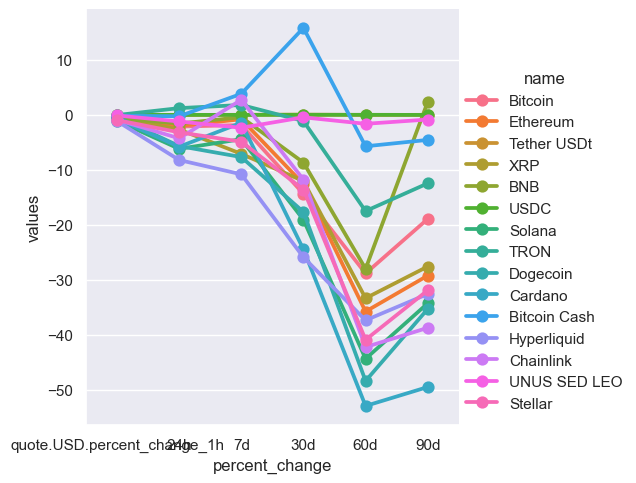

In [59]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [60]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,89343.70310,2025-12-05 23:22:33.026734


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

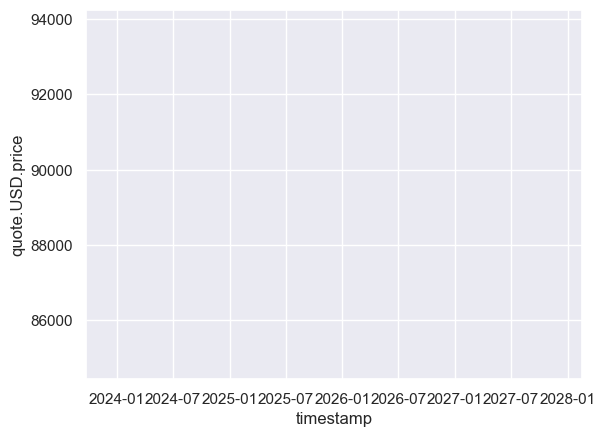

In [61]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)